In [21]:
import pandas as pd

df = pd.read_csv('Eartquakes-1990-2023.csv')
print(df.head())

           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:

In [22]:
# distinct status, tsunami, data_type, 
distinct_status = df['status'].unique()
print(distinct_status)
print('---')

distinct_tsunami = df['tsunami'].unique()
print(distinct_tsunami)
print('---')

distinct_data_type = df['data_type'].unique()
print(distinct_data_type)


['reviewed' 'automatic' 'AUTOMATIC' 'REVIEWED' 'MANUAL' 'manual']
---
[0 1]
---
['earthquake' 'quarry blast' 'explosion' 'other event' 'nuclear explosion'
 'rock burst' 'ice quake' 'chemical explosion' 'sonic boom'
 'mine collapse' 'rockslide' 'Rock Slide' 'accidental explosion'
 'landslide' 'quarry' 'mining explosion' 'acoustic noise' 'not reported'
 'experimental explosion' 'collapse' 'meteorite'
 'induced or triggered event' 'volcanic eruption' 'Ice Quake'
 'snow avalanche']


In [23]:
# Remove columns
df.drop(columns=['time', 'place', 'status'], inplace=True)
print(df.head())

   tsunami  significance   data_type  magnitudo        state   longitude  \
0        0            96  earthquake       2.50       Alaska -149.669200   
1        0            31  earthquake       1.41       Hawaii -155.212333   
2        0            19  earthquake       1.11   California -122.806167   
3        0            15  earthquake       0.98   California -118.846333   
4        0           134  earthquake       2.95   California -118.934000   

    latitude   depth                              date  
0  61.730200  30.100  1990-01-01 00:22:33.990000+00:00  
1  19.317667   6.585  1990-01-01 00:24:51.210000+00:00  
2  38.821000   3.220  1990-01-01 00:34:43.450000+00:00  
3  37.664333  -0.584  1990-01-01 00:58:32.130000+00:00  
4  34.546000  16.122  1990-01-01 01:03:44.490000+00:00  


In [24]:
# Split date column into "date" and "time"
df[['date', 'time']] = df['date'].str.split(' ', expand=True)
print(df.head())

   tsunami  significance   data_type  magnitudo        state   longitude  \
0        0            96  earthquake       2.50       Alaska -149.669200   
1        0            31  earthquake       1.41       Hawaii -155.212333   
2        0            19  earthquake       1.11   California -122.806167   
3        0            15  earthquake       0.98   California -118.846333   
4        0           134  earthquake       2.95   California -118.934000   

    latitude   depth        date                   time  
0  61.730200  30.100  1990-01-01  00:22:33.990000+00:00  
1  19.317667   6.585  1990-01-01  00:24:51.210000+00:00  
2  38.821000   3.220  1990-01-01  00:34:43.450000+00:00  
3  37.664333  -0.584  1990-01-01  00:58:32.130000+00:00  
4  34.546000  16.122  1990-01-01  01:03:44.490000+00:00  


In [25]:
# Only Earthquake data
df_earthquake = df[df['data_type'] == 'earthquake']
print(df_earthquake)

         tsunami  significance   data_type  magnitudo        state  \
0              0            96  earthquake       2.50       Alaska   
1              0            31  earthquake       1.41       Hawaii   
2              0            19  earthquake       1.11   California   
3              0            15  earthquake       0.98   California   
4              0           134  earthquake       2.95   California   
...          ...           ...         ...        ...          ...   
3445746        0           326  earthquake       4.60        Japan   
3445747        0            44  earthquake       1.70       Alaska   
3445748        0            90  earthquake       2.42         B.C.   
3445749        0            16  earthquake       1.03   California   
3445750        0            12  earthquake       0.90       Alaska   

          longitude   latitude    depth        date                   time  
0       -149.669200  61.730200   30.100  1990-01-01  00:22:33.990000+00:00  
1    

In [26]:
# Take the Earthquake data from 2008 onward because the Global Market Data has data from 2008 to 2023
df_earthquake = df_earthquake[df_earthquake['date'] >= '2008-01-01']
print(df_earthquake)

         tsunami  significance   data_type  magnitudo                 state  \
1437789        0            15  earthquake       1.00                Alaska   
1437790        0           211  earthquake       3.70   U.S. Virgin Islands   
1437791        0           259  earthquake       4.10                Turkey   
1437792        0            15  earthquake       1.00                Alaska   
1437793        0           234  earthquake       3.90           Philippines   
...          ...           ...         ...        ...                   ...   
3445746        0           326  earthquake       4.60                 Japan   
3445747        0            44  earthquake       1.70                Alaska   
3445748        0            90  earthquake       2.42                  B.C.   
3445749        0            16  earthquake       1.03            California   
3445750        0            12  earthquake       0.90                Alaska   

          longitude   latitude    depth        date

In [27]:
# correct misspelling 'magnitudo' to 'magnitude'
df_earthquake.rename(columns={'magnitudo': 'magnitude'}, inplace=True)
print(df_earthquake)

         tsunami  significance   data_type  magnitude                 state  \
1437789        0            15  earthquake       1.00                Alaska   
1437790        0           211  earthquake       3.70   U.S. Virgin Islands   
1437791        0           259  earthquake       4.10                Turkey   
1437792        0            15  earthquake       1.00                Alaska   
1437793        0           234  earthquake       3.90           Philippines   
...          ...           ...         ...        ...                   ...   
3445746        0           326  earthquake       4.60                 Japan   
3445747        0            44  earthquake       1.70                Alaska   
3445748        0            90  earthquake       2.42                  B.C.   
3445749        0            16  earthquake       1.03            California   
3445750        0            12  earthquake       0.90                Alaska   

          longitude   latitude    depth        date

In [28]:
# Check for missing values
print(df_earthquake.isnull().sum())

tsunami         0
significance    0
data_type       0
magnitude       0
state           0
longitude       0
latitude        0
depth           0
date            0
time            0
dtype: int64


In [29]:
# check datatype
print(df_earthquake['magnitude'])
print(df_earthquake['depth'])
print(df_earthquake['date'])

1437789    1.00
1437790    3.70
1437791    4.10
1437792    1.00
1437793    3.90
           ... 
3445746    4.60
3445747    1.70
3445748    2.42
3445749    1.03
3445750    0.90
Name: magnitude, Length: 1960692, dtype: float64
1437789      7.000
1437790     58.900
1437791      5.000
1437792      2.500
1437793    571.000
            ...   
3445746     83.039
3445747     24.400
3445748      1.770
3445749      1.720
3445750    250.000
Name: depth, Length: 1960692, dtype: float64
1437789    2008-01-01
1437790    2008-01-01
1437791    2008-01-01
1437792    2008-01-01
1437793    2008-01-01
              ...    
3445746    2023-07-29
3445747    2023-07-29
3445748    2023-07-29
3445749    2023-07-29
3445750    2023-07-29
Name: date, Length: 1960692, dtype: object


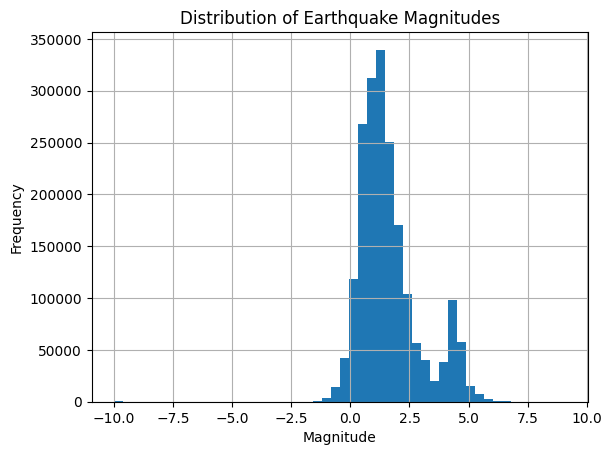

         tsunami  significance   data_type  magnitude                 state  \
1437789        0            15  earthquake        1.0                Alaska   
1437790        0           211  earthquake        3.7   U.S. Virgin Islands   
1437791        0           259  earthquake        4.1                Turkey   
1437792        0            15  earthquake        1.0                Alaska   
1437793        0           234  earthquake        3.9           Philippines   

         longitude  latitude  depth        date                   time  
1437789  -151.1559   63.5157    7.0  2008-01-01  00:12:09.076000+00:00  
1437790   -64.3440   19.0990   58.9  2008-01-01  00:16:25.360000+00:00  
1437791    35.7430   37.5690    5.0  2008-01-01         00:21:41+00:00  
1437792  -151.9871   63.2654    2.5  2008-01-01  00:22:48.187000+00:00  
1437793   124.0480    6.4840  571.0  2008-01-01  00:25:46.830000+00:00  


In [30]:
# Distribution of Earthquake Magnitudes
# visualize the distribution of magnitudes to see how they are spread
import matplotlib.pyplot as plt
df_earthquake['magnitude'].hist(bins=50)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

print(df_earthquake.head())

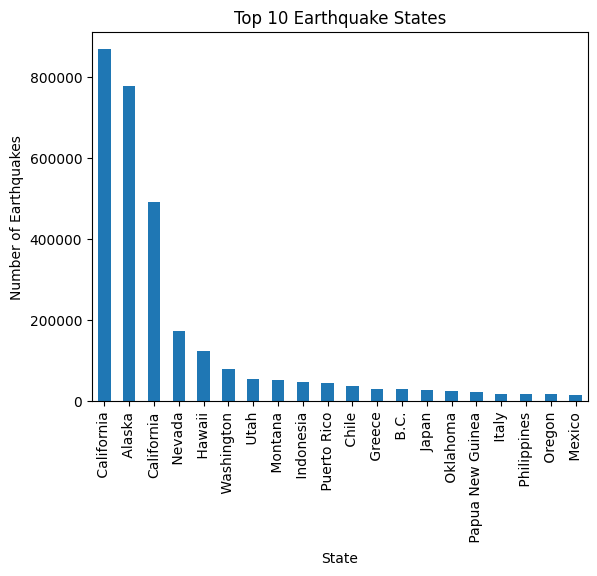

         tsunami  significance   data_type  magnitude                 state  \
1437789        0            15  earthquake        1.0                Alaska   
1437790        0           211  earthquake        3.7   U.S. Virgin Islands   
1437791        0           259  earthquake        4.1                Turkey   
1437792        0            15  earthquake        1.0                Alaska   
1437793        0           234  earthquake        3.9           Philippines   

         longitude  latitude  depth        date                   time  
1437789  -151.1559   63.5157    7.0  2008-01-01  00:12:09.076000+00:00  
1437790   -64.3440   19.0990   58.9  2008-01-01  00:16:25.360000+00:00  
1437791    35.7430   37.5690    5.0  2008-01-01         00:21:41+00:00  
1437792  -151.9871   63.2654    2.5  2008-01-01  00:22:48.187000+00:00  
1437793   124.0480    6.4840  571.0  2008-01-01  00:25:46.830000+00:00  


In [31]:
# Explore Earthquake Locations
# Investigate the locations (state, place) where earthquakes occur most frequently. 
# Create a bar plot of the number of earthquakes by state or country.
state_counts = df['state'].value_counts().head(20)
state_counts.plot(kind='bar')
plt.title('Top 10 Earthquake States')
plt.xlabel('State')
plt.ylabel('Number of Earthquakes')
plt.show()

print(df_earthquake.head())

In [32]:
# Convert 'date' column to datetime format
df_earthquake['date'] = pd.to_datetime(df_earthquake['date'], errors='coerce')

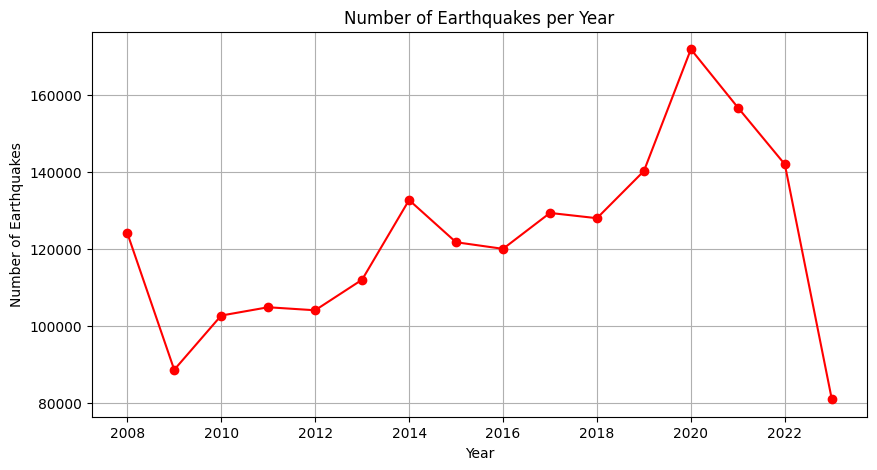

         tsunami  significance   data_type  magnitude                 state  \
1437789        0            15  earthquake        1.0                Alaska   
1437790        0           211  earthquake        3.7   U.S. Virgin Islands   
1437791        0           259  earthquake        4.1                Turkey   
1437792        0            15  earthquake        1.0                Alaska   
1437793        0           234  earthquake        3.9           Philippines   

         longitude  latitude  depth       date                   time  
1437789  -151.1559   63.5157    7.0 2008-01-01  00:12:09.076000+00:00  
1437790   -64.3440   19.0990   58.9 2008-01-01  00:16:25.360000+00:00  
1437791    35.7430   37.5690    5.0 2008-01-01         00:21:41+00:00  
1437792  -151.9871   63.2654    2.5 2008-01-01  00:22:48.187000+00:00  
1437793   124.0480    6.4840  571.0 2008-01-01  00:25:46.830000+00:00  


In [33]:
# Time Series Analysis (Trends over time)
# Since earthquakes are recorded over time, analyze if the frequency of earthquakes is increasing or decreasing.

# Group by year without modifying the original DataFrame
earthquakes_per_year = df_earthquake.groupby(df_earthquake['date'].dt.year).size()

# Plot time series
plt.figure(figsize=(10, 5))
earthquakes_per_year.plot(kind='line', marker='o', color='red')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# Check if the original DataFrame is unchanged
print(df_earthquake.head())

In [34]:
# Correlation Analysis
# Look for relationships between variables such as magnitude, depth, and significance.
correlation_matrix = df_earthquake[['magnitude', 'depth', 'significance']].corr()
print(correlation_matrix)

              magnitude     depth  significance
magnitude      1.000000  0.360022      0.933982
depth          0.360022  1.000000      0.347790
significance   0.933982  0.347790      1.000000


In [35]:
# Filter earthquakes data with 'magnitude' >= 6.0
df_major_earthquakes = df_earthquake[df_earthquake['magnitude'] >= 6.0]
print(df_major_earthquakes.head())

         tsunami  significance   data_type  magnitude              state  \
1437999        0           613  earthquake        6.3   Papua New Guinea   
1438669        0           557  earthquake        6.0          Indonesia   
1438968        0           671  earthquake        6.6             Canada   
1438979        0           630  earthquake        6.4             Canada   
1439178        0           920  earthquake        6.2             Greece   

         longitude  latitude  depth       date                   time  
1437999    146.884    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1438669    101.032    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
1438968   -130.746    51.254   15.0 2008-01-05  11:01:06.110000+00:00  
1438979   -130.542    51.163   10.0 2008-01-05  11:44:48.170000+00:00  
1439178     22.693    37.216   75.0 2008-01-06  05:14:20.180000+00:00  


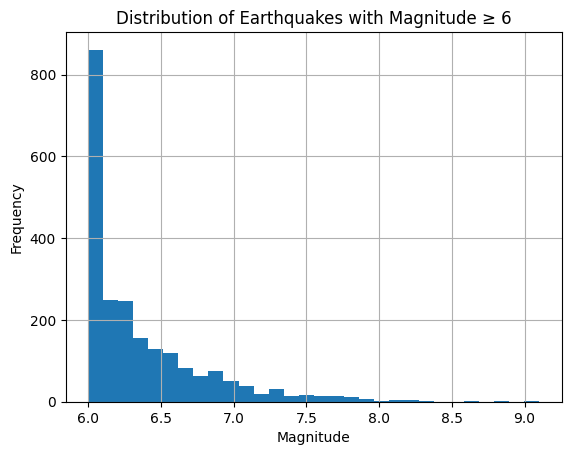

         tsunami  significance   data_type  magnitude              state  \
1437999        0           613  earthquake        6.3   Papua New Guinea   
1438669        0           557  earthquake        6.0          Indonesia   
1438968        0           671  earthquake        6.6             Canada   
1438979        0           630  earthquake        6.4             Canada   
1439178        0           920  earthquake        6.2             Greece   

         longitude  latitude  depth       date                   time  
1437999    146.884    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1438669    101.032    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
1438968   -130.746    51.254   15.0 2008-01-05  11:01:06.110000+00:00  
1438979   -130.542    51.163   10.0 2008-01-05  11:44:48.170000+00:00  
1439178     22.693    37.216   75.0 2008-01-06  05:14:20.180000+00:00  


In [36]:
# Plot histogram for magnitudes >= 6
import matplotlib.pyplot as plt

df_major_earthquakes['magnitude'].hist(bins=30)  
plt.title('Distribution of Earthquakes with Magnitude ≥ 6')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

print(df_major_earthquakes.head())

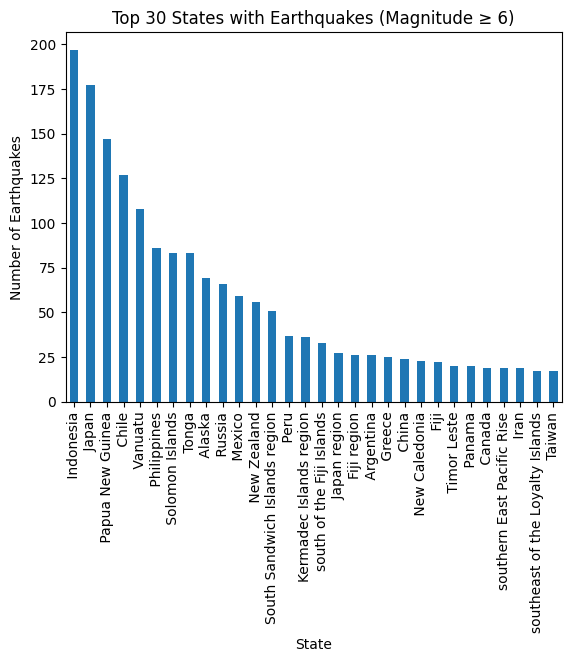

         tsunami  significance   data_type  magnitude              state  \
1437999        0           613  earthquake        6.3   Papua New Guinea   
1438669        0           557  earthquake        6.0          Indonesia   
1438968        0           671  earthquake        6.6             Canada   
1438979        0           630  earthquake        6.4             Canada   
1439178        0           920  earthquake        6.2             Greece   

         longitude  latitude  depth       date                   time  
1437999    146.884    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1438669    101.032    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
1438968   -130.746    51.254   15.0 2008-01-05  11:01:06.110000+00:00  
1438979   -130.542    51.163   10.0 2008-01-05  11:44:48.170000+00:00  
1439178     22.693    37.216   75.0 2008-01-06  05:14:20.180000+00:00  


In [37]:
# Count earthquakes by state (only those with magnitude >= 6)
state_counts = df_major_earthquakes['state'].value_counts().head(30)

# Plot bar chart
state_counts.plot(kind='bar')
plt.title('Top 30 States with Earthquakes (Magnitude ≥ 6)')
plt.xlabel('State')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

print(df_major_earthquakes.head())


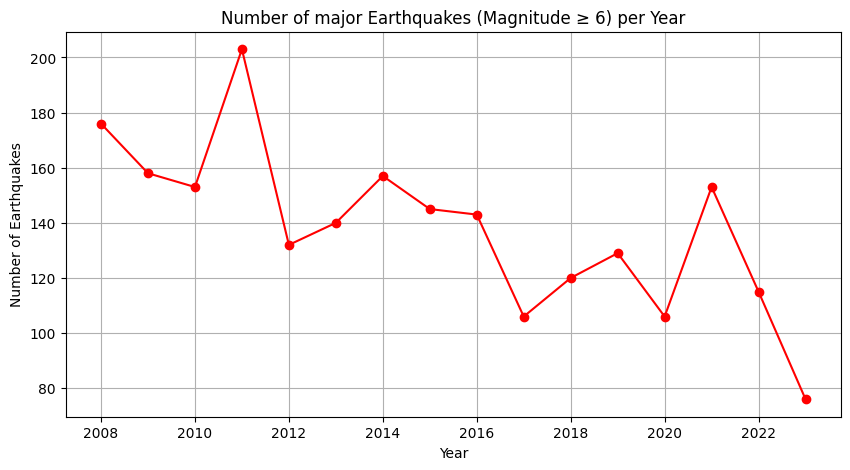

         tsunami  significance   data_type  magnitude              state  \
1437999        0           613  earthquake        6.3   Papua New Guinea   
1438669        0           557  earthquake        6.0          Indonesia   
1438968        0           671  earthquake        6.6             Canada   
1438979        0           630  earthquake        6.4             Canada   
1439178        0           920  earthquake        6.2             Greece   

         longitude  latitude  depth       date                   time  
1437999    146.884    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1438669    101.032    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
1438968   -130.746    51.254   15.0 2008-01-05  11:01:06.110000+00:00  
1438979   -130.542    51.163   10.0 2008-01-05  11:44:48.170000+00:00  
1439178     22.693    37.216   75.0 2008-01-06  05:14:20.180000+00:00  


In [38]:
# Time Series Analysis (Trends over time)
# Since earthquakes are recorded over time, analyze if the frequency of earthquakes is increasing or decreasing.

# Group by year without modifying the original DataFrame
earthquakes_per_year = df_major_earthquakes.groupby(df_major_earthquakes['date'].dt.year).size()

# Plot time series
plt.figure(figsize=(10, 5))
earthquakes_per_year.plot(kind='line', marker='o', color='red')
plt.title('Number of major Earthquakes (Magnitude ≥ 6) per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# Check if the original DataFrame is unchanged
print(df_major_earthquakes.head())

In [ ]:
# Save result to new csv file
#df_major_earthquakes.to_csv("clean_major_earthquakes.csv", index=False)